## Dimensionality reduction and manifold learning
* Today we are going to learn how to visualize and explore the data
![intro](http://sarahannelawless.com/wp-content/uploads/2015/03/tw-1-600x449.jpg)

In [1]:
from time import time
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST digits dataset

In [10]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape


In [11]:
print X.shape
print y.shape

(1797, 64)
(1797,)


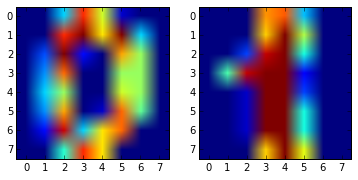

In [12]:
# a few testimonials
plt.subplot(1,2,1)
plt.imshow(X[0].reshape(8,8))
plt.subplot(1,2,2)
plt.imshow(X[1].reshape(8,8))

### Visualize the data
We shall start with a random projection

In [13]:
from matplotlib import offsetbox
def plot_embedding(X,y,ax=None,show_images=True,min_dist=1e-2):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if not show_images:
        return
    if ax is None:
        ax = plt.subplot(1,1,1)
        
    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < min_dist: continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            X[i])
        ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])


In [14]:
from sklearn.random_projection import GaussianRandomProjection

Xrp = GaussianRandomProjection(n_components=2).fit_transform(X)

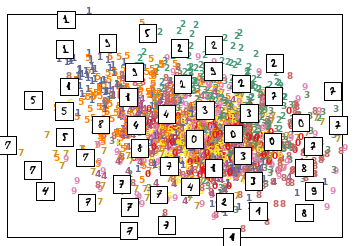

In [16]:
plot_embedding(Xrp,y)

Re-running a few times will yield different outcomes

### Principial component analysis
* The PCA is basically equivalent to eigenvector basis transformation of the data.
* The only difference is that we now take top-N first components of eigendecomposition

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

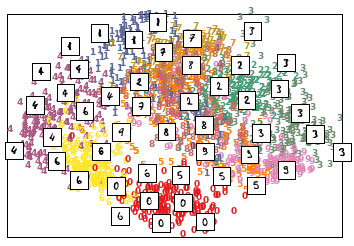

In [19]:
plot_embedding(Xpca[:,:2],y)

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


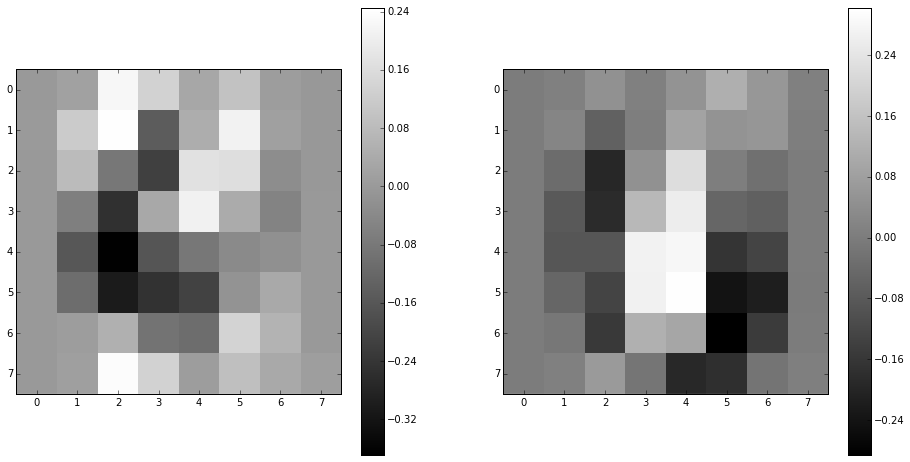

In [20]:
n = pca.n_components
plt.figure(figsize=[16,8])
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(pca.components_[i].reshape(8,8),
              cmap='gray',interpolation='none')
    plt.colorbar()


### SVD

SVD decomposition is similar to PCA 

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
Xsvd = svd.fit_transform(X)

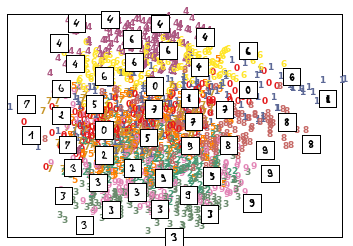

In [22]:
plot_embedding(Xsvd,y)

# LDA projection

* The Linear Discriminant Analysis is also a linear method, but unlike SVD or PCA it is a supervised classification method with data decomposition being a side effect

In [17]:
!pip install --upgrade sklearn

    100% |################################| 17.6MB 75kB/s 
  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
  Found existing installation: scikit-learn 0.16.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.16.1:
      Successfully uninstalled scikit-learn-0.16.1
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
Xlda = lda.fit_transform(X,y)

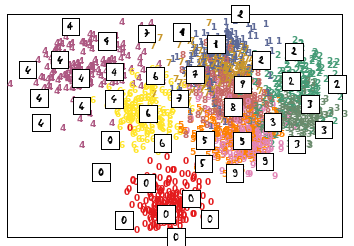

In [24]:
plot_embedding(Xlda,y)

##### Hard mode enabled

#### Please go to "load the mnist dataset" cell and change n_class to 10.

##### Re-run all the tabs and re-evaluate the methods

# Embedding methods

* Unlike linear/quadratic/rbf decomposition methods, embeddings are not bound to any function basis.

* Instead, these methods try to "assign" coordinates to each point, so that some measure of "fitness" is maximized.

### Multidimensional Scaling

* One of the first manifold learning methods.
* Core idea: map high-dimensional data to 2D space while trying to preserve distances as well as possible
* Fitness: euclidian difference between embedded points must be as close to distance between original points as possible

In [25]:
from sklearn.manifold import MDS
mds = MDS(n_components=2,verbose=2,n_init=1)
Xmds = mds.fit_transform(X)

it: 0, stress 3799745803.7
it: 1, stress 765780871.017
it: 2, stress 748634922.098
it: 3, stress 736083663.403
it: 4, stress 726283502.264
it: 5, stress 718690659.699
it: 6, stress 712692773.549
it: 7, stress 707746613.528
it: 8, stress 703531647.047
it: 9, stress 699932449.01
it: 10, stress 696895344.824
it: 11, stress 694318744.485
it: 12, stress 692088989.179
it: 13, stress 690143714.313
it: 14, stress 688419857.986
it: 15, stress 686882933.451
it: 16, stress 685507916.65
it: 17, stress 684269488.9
it: 18, stress 683153278.808
it: 19, stress 682144005.478
it: 20, stress 681224509.933
it: 21, stress 680376762.966
it: 22, stress 679580473.361
it: 23, stress 678821442.473
it: 24, stress 678083842.223
it: 25, stress 677350319.846
it: 26, stress 676610900.977
it: 27, stress 675859998.525
it: 28, stress 675087470.775
it: 29, stress 674288542.768
it: 30, stress 673456272.56
it: 31, stress 672581918.304
it: 32, stress 671652296.05
it: 33, stress 670661498.916
it: 34, stress 669600218.857
it

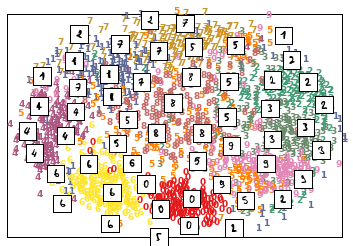

In [26]:
plot_embedding(Xmds,y)

# t-SNE
t-distributed Stochasitc Neiborhood Embedding

* Conceptually similar to MDS, but only pays attention to nearest points in the hi-dim space.
* Tries to embed close points to close coordinates, while ignoring distance between far points.



* In other words, tSNE tries to preserve low-level structure of the space while ignoring high-level structure.

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=2,perplexity=50)
Xtsne = tsne.fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.731744
[t-SNE] Iteration 25: error = 1.3763468, gradient norm = 0.0066535
[t-SNE] Iteration 50: error = 1.2302269, gradient norm = 0.0055900
[t-SNE] Iteration 75: error = 0.8908995, gradient norm = 0.0041217
[t-SNE] Iteration 100: error = 0.8498217, gradient norm = 0.0038532
[t-SNE] Error after 100 iterations with early exaggeration: 0.849822
[t-SNE] Iteration 125: error = 0.7730527, gradient norm = 0.0035585
[t-SNE] Iteration 150: error = 0.7572011, gradient norm = 0.0034358
[t-SNE] Iteration 175: error = 0.7476465, gradient norm = 0.0038196
[t-SNE] Iteration 200: error = 0.7478178, gradient norm = 0.0038578
[t-SNE] Iteration 225: error = 0.7540067, gradient norm = 0.0037594
[t-SNE] Iteration 225: did not make any progress during the last 30 episodes. 

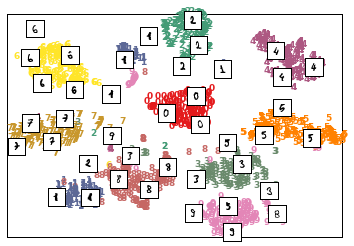

In [28]:
plot_embedding(Xtsne,y)

# Finished early?
 * See how tSNE results change when you change perplexity from 1 to 100
   * Do not take every integer value for the sake of CPU costs
   * some 10 points like [1,5,...50,100] is probably fine
   
   
 * Try computing tSNE embedding over PCA-transformed data
   * For example, take 16-component PCA and apply TSNE to it
 
 
 * Try Isomap, LocallyLinearEmbedding and SpectralEmbedding
   * Both are in sklearn.manifold
   * See if it is possible to produce tSNE-like results

In [ ]:
for perplex in [1, 5, 10, 20, 35, 50, 75, 100]:
    tsne = TSNE(n_components=2,verbose=0,perplexity=perplex)

In [ ]:
<Isomap, LLE and Spectral Embedding>